In [1]:
import copy
import pylab
import random
import numpy as np
from environment import Env
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
EPISODES = 1000

In [3]:
class DeepSARSAgent:
    def __init__(self):
        self.load_model = False
        # 에이전트가 가능한 모든 행동 정의
        self.action_space = [0, 1, 2, 3, 4]
        # 상태의 크기와 행동의 크기 정의
        self.action_size = len(self.action_space)
        self.state_size = 15
        self.discount_factor = 0.99
        self.learning_rate = 0.001

        self.epsilon = 1.  # exploration
        self.epsilon_decay = .9999
        self.epsilon_min = 0.01
        self.model = self.build_model()

        if self.load_model:
            self.epsilon = 0.05
            self.model.load_weights('./save_model/deep_sarsa_trained.h5')

    # 상태가 입력 큐함수가 출력인 인공신경망 생성
    def build_model(self):
        model = Sequential()
        model.add(Dense(30, input_dim=self.state_size, activation='relu'))
        model.add(Dense(30, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # 입실론 탐욕 방법으로 행동 선택
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            # 무작위 행동 반환
            return random.randrange(self.action_size)
        else:
            # 모델로부터 행동 산출
            state = np.float32(state)
            q_values = self.model.predict(state)
            return np.argmax(q_values[0])

    def train_model(self, state, action, reward, next_state, next_action, done):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        state = np.float32(state)
        next_state = np.float32(next_state)
        target = self.model.predict(state)[0]
        # 살사의 큐함수 업데이트 식
        if done:
            target[action] = reward
        else:
            target[action] = (reward + self.discount_factor *
                              self.model.predict(next_state)[0][next_action])

        # 출력 값 reshape
        target = np.reshape(target, [1, 5])
        # 인공신경망 업데이트
        self.model.fit(state, target, epochs=1, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 1,565
Trainable params: 1,565
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: -10 global_step 66   epsilon: 0.9934214043119836
episode: 1   score: -7 global_step 157   epsilon: 0.9844218297185002
episode: 2   score: -9 global_step 235   epsilon: 0.9767728268835811
episode: 3   score: -25 global_step 456   epsilon: 0.955421876879543
episode: 4   score: -8 global_step 585   epsilon: 0.9431754814234209
episode: 5   score: -15 global_step 6

episode: 106   score: 0 global_step 4725   epsilon: 0.6234269844990354
episode: 107   score: -4 global_step 4785   epsilon: 0.6196974359463622
episode: 108   score: -3 global_step 4827   epsilon: 0.6171000352031156
episode: 109   score: -7 global_step 4910   epsilon: 0.6119990482385808
episode: 110   score: 1 global_step 4929   epsilon: 0.61083729597251
episode: 111   score: -1 global_step 4948   epsilon: 0.6096777490502739
episode: 112   score: 1 global_step 4962   epsilon: 0.6088247547864936
episode: 113   score: 1 global_step 4979   epsilon: 0.6077905802911672
episode: 114   score: -1 global_step 5001   epsilon: 0.6064548440752141
episode: 115   score: 0 global_step 5014   epsilon: 0.6056669256392918
episode: 116   score: 1 global_step 5024   epsilon: 0.6050615311911016
episode: 117   score: 1 global_step 5047   epsilon: 0.6036714194040076
episode: 118   score: -4 global_step 5106   epsilon: 0.6001200672502006
episode: 119   score: -4 global_step 5146   epsilon: 0.5977242619940188
e

episode: 221   score: -1 global_step 7439   epsilon: 0.47523911696321086
episode: 222   score: 0 global_step 7457   epsilon: 0.4743844132808764
episode: 223   score: 0 global_step 7475   epsilon: 0.4735312467581706
episode: 224   score: 0 global_step 7491   epsilon: 0.4727741647357625
episode: 225   score: 1 global_step 7504   epsilon: 0.472159926950275
episode: 226   score: 1 global_step 7517   epsilon: 0.4715464871949787
episode: 227   score: 0 global_step 7525   epsilon: 0.4711693820118359
episode: 228   score: 1 global_step 7541   epsilon: 0.47041607614010633
episode: 229   score: 1 global_step 7555   epsilon: 0.4697579215409553
episode: 230   score: 0 global_step 7578   epsilon: 0.46867866597742736
episode: 231   score: 1 global_step 7595   epsilon: 0.4678825493296615
episode: 232   score: -4 global_step 7617   epsilon: 0.4668542878096283
episode: 233   score: 0 global_step 7638   epsilon: 0.46587487357859586
episode: 234   score: 1 global_step 7653   epsilon: 0.46517655022493576


episode: 336   score: 0 global_step 9586   epsilon: 0.38341093287401806
episode: 337   score: 1 global_step 9603   epsilon: 0.38275965546637275
episode: 338   score: -1 global_step 9644   epsilon: 0.38119347543179116
episode: 339   score: 1 global_step 9675   epsilon: 0.3800135464953477
episode: 340   score: 0 global_step 9693   epsilon: 0.37933010322240746
episode: 341   score: 0 global_step 9714   epsilon: 0.3785343060945751
episode: 342   score: 1 global_step 9733   epsilon: 0.37781573784000577
episode: 343   score: 0 global_step 9753   epsilon: 0.3770608237837007
episode: 344   score: 1 global_step 9769   epsilon: 0.37645797872754994
episode: 345   score: 1 global_step 9785   epsilon: 0.3758560975004124
episode: 346   score: 1 global_step 9798   epsilon: 0.37536777763395
episode: 347   score: 0 global_step 9817   epsilon: 0.3746552203717593
episode: 348   score: 1 global_step 9832   epsilon: 0.3740936307587661
episode: 349   score: 0 global_step 9847   epsilon: 0.3735328829407787
e

episode: 450   score: 1 global_step 11749   epsilon: 0.30883171906829177
episode: 451   score: 0 global_step 11791   epsilon: 0.30753728134737224
episode: 452   score: 1 global_step 11803   epsilon: 0.3071684395167181
episode: 453   score: 1 global_step 11813   epsilon: 0.3068614092661454
episode: 454   score: 1 global_step 11845   epsilon: 0.30588097326815405
episode: 455   score: -2 global_step 11882   epsilon: 0.3047512484596675
episode: 456   score: 0 global_step 11902   epsilon: 0.3041423246428515
episode: 457   score: 1 global_step 11916   epsilon: 0.30371680204718965
episode: 458   score: 0 global_step 11935   epsilon: 0.3031402591848477
episode: 459   score: 1 global_step 11952   epsilon: 0.30262533280892284
episode: 460   score: 1 global_step 11972   epsilon: 0.302020656786591
episode: 461   score: 1 global_step 11989   epsilon: 0.30150763221284493
episode: 462   score: 1 global_step 12007   epsilon: 0.30096537953560126
episode: 463   score: 0 global_step 12025   epsilon: 0.30

KeyboardInterrupt: 

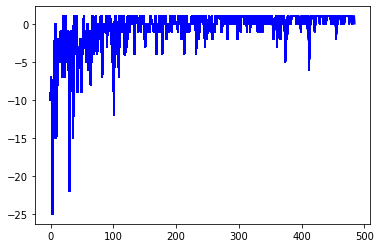

In [4]:
env = Env()
agent = DeepSARSAgent()

global_step = 0
scores, episodes = [], []

for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, 15])

    while not done:
            # env 초기화
        global_step += 1

            # 현재 상태에 대한 행동 선택
        action = agent.get_action(state)
            # 선택한 행동으로 환경에서 한 타임스텝 진행 후 샘플 수집
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state, [1, 15])
        next_action = agent.get_action(next_state)
            # 샘플로 모델 학습
        agent.train_model(state, action, reward, next_state, next_action,
                              done)
        state = next_state
        score += reward

        state = copy.deepcopy(next_state)

        if done:
                # 에피소드마다 학습 결과 출력
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            pylab.savefig("./save_graph/deep_sarsa_.png")
            print("episode:", e, "  score:", score, "global_step",
                      global_step, "  epsilon:", agent.epsilon)

        # 100 에피소드마다 모델 저장
    if e % 100 == 0:
        agent.model.save_weights("./save_model/deep_sarsa.h5")